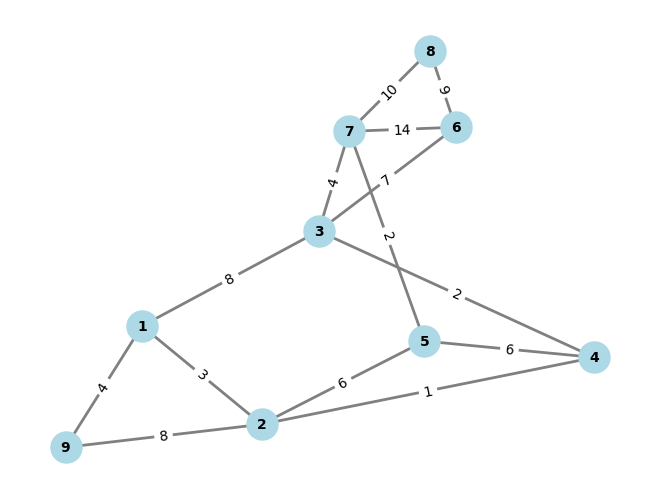

从节点 9 到节点 8 的最短路径: [9, 1, 2, 4, 3, 7, 8]
从节点 9 到节点 8 的路径长度: 24


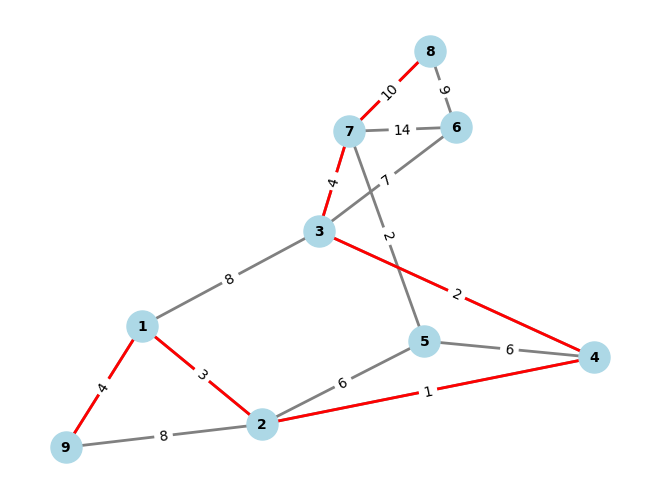

从节点 1 到节点 2 的最短路径长度: 3
从节点 9 到节点 4 的最短路径长度: 8
距离节点 2 不超过 10 的所有节点: [2, 4, 1, 3, 5, 9, 7, 6]
这些节点到节点 2 的距离: {2: 0, 4: 1, 1: 3, 3: 3, 5: 6, 9: 7, 7: 7, 6: 10}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义图的边和权重
s = [9, 9, 1, 1, 3, 3, 3, 2, 2, 5, 5, 7, 7, 8]  # 起始节点编号
t = [1, 2, 2, 3, 4, 6, 7, 4, 5, 4, 7, 6, 8, 6]  # 终止节点编号
w = [4, 8, 3, 8, 2, 7, 4, 1, 6, 6, 2, 14, 10, 9]  # 边的权重

# 创建一个无向图
G = nx.Graph()

# 添加边和权重
for i in range(len(s)):
    G.add_edge(s[i], t[i], weight=w[i])

# 绘制图形 G，并将边的权重添加到图形上
# pos = nx.spring_layout(G)  # 使用弹簧布局
# pos = nx.circular_layout(G)  # 使用环形布局
# pos = nx.spectral_layout(G)  # 使用谱聚类布局
# pos = nx.kamada_kawai_layout(G)  # 使用加权Kamada-Kawai布局
pos = nx.fruchterman_reingold_layout(G)  # 使用Fruchterman-Reingold布局
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=10, font_weight='bold', edge_color='gray', width=2)# 绘制图形
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)# 显示边的权重
plt.axis('off')  # 隐藏坐标轴
plt.show()# 显示图形

# 计算从节点 9 到节点 8 的最短路径和路径长度
P = nx.shortest_path(G, source=9, target=8, weight='weight')
d = nx.shortest_path_length(G, source=9, target=8, weight='weight')
print(f"从节点 9 到节点 8 的最短路径: {P}")
print(f"从节点 9 到节点 8 的路径长度: {d}")

# 在图形 G 中高亮显示最短路径
edge_list = list(zip(P[:-1], P[1:]))# 路径上的边
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray', width=2)
nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color='r', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')  # 隐藏坐标轴
plt.show()

# 计算图 G 中任意两点之间的最短路径矩阵
D = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# 输出 1 到 2 的最短路径长度
print(f"从节点 1 到节点 2 的最短路径长度: {D[1][2]}")

# 输出 9 到 4 的最短路径长度
print(f"从节点 9 到节点 4 的最短路径长度: {D[9][4]}")

# 找出图 G 中距离节点 2 不超过 10 的所有节点
nearest_nodes = [node for node, dist in D[2].items() if dist <= 10]
nearest_distances = {node: dist for node, dist in D[2].items() if dist <= 10}
print(f"距离节点 2 不超过 10 的所有节点: {nearest_nodes}")
print(f"这些节点到节点 2 的距离: {nearest_distances}")